In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/nyc_jobs.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000


In [4]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [5]:
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     269
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          12
Preferred Skills                  375
Additional Information           1186
To Apply                            1
Hours/Shift                      2106
Work Location 1                  1695
Recruitment Contact              3123
Residency Requirement               0
Posting Date                        0
Post Until                       2237
Posting Upda

In [6]:
df.shape

(3123, 28)

In [7]:
Agency = df['Agency'].dropna()

In [8]:
Agency=Agency.tolist() 

In [9]:
print(len(Agency))

3123


In [13]:
top5Agency = df['Agency'].value_counts()
top5Agency[0:5]

DEPT OF ENVIRONMENT PROTECTION    678
DEPT OF HEALTH/MENTAL HYGIENE     276
DEPT OF DESIGN & CONSTRUCTION     239
NYC HOUSING AUTHORITY             222
DEPARTMENT OF TRANSPORTATION      183
Name: Agency, dtype: int64

In [15]:
top10Business_Title = df['Business Title'].value_counts()
top10Business_Title[0:10]

Project Manager                   38
Assistant Civil Engineer          26
ACCOUNTABLE MANAGER               26
Engineering Technician I          20
Director                          20
Assistant General Counsel         19
Stationary Engineer (Electric)    15
College Aide                      14
Budget Analyst                    14
Investigator                      14
Name: Business Title, dtype: int64

In [16]:
top10Civil_Service_Title = df['Civil Service Title'].value_counts()
top10Civil_Service_Title[0:10]

COMMUNITY COORDINATOR             185
AGENCY ATTORNEY                   119
CIVIL ENGINEER                    110
CITY RESEARCH SCIENTIST            82
ADMINISTRATIVE PROJECT MANAGER     78
COMPUTER SPECIALIST (SOFTWARE)     62
ADMINISTRATIVE BUSINESS PROMOT     61
ASSOCIATE PROJECT MANAGER          60
CLERICAL ASSOCIATE                 59
ADMINISTRATIVE ENGINEER            57
Name: Civil Service Title, dtype: int64

In [18]:
top5Business_Title = df['Business Title'].value_counts()
top5Business_Title = top5Business_Title[0:5]
print(type(top5Business_Title))

<class 'pandas.core.series.Series'>


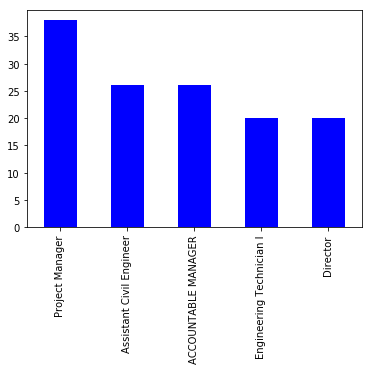

In [19]:
top5Business_Title.plot.bar(stacked=True, colormap='winter')

In [20]:
top5Residency_Requirement= df['Residency Requirement'].value_counts()
top5Residency_Requirement[0:5]

New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.    1789
New York City Residency is not required for this position                                                                                                                                                                                                                                                                                                                                                            712
NYCHA has no residency requirements.                                                                                                                                                  

In [22]:
diffBusiness_Title= df['Business Title'].dropna()

In [23]:
diffBusiness_Title.value_counts()

Project Manager                                                       38
Assistant Civil Engineer                                              26
ACCOUNTABLE MANAGER                                                   26
Engineering Technician I                                              20
Director                                                              20
Assistant General Counsel                                             19
Stationary Engineer (Electric)                                        15
College Aide                                                          14
Budget Analyst                                                        14
Investigator                                                          14
Confidential Investigator                                             14
Senior Project Manager                                                14
Community Coordinator                                                 14
Deputy Director                                    

In [25]:
dfBusiness_Title= df['Business Title'].value_counts()
dfBusiness_Title = dfBusiness_Title[0:10]

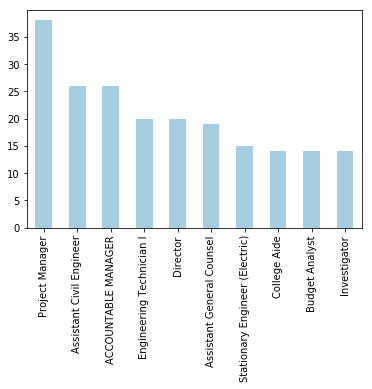

In [26]:
dfBusiness_Title.plot.bar(stacked=True, colormap='Paired')

# Analysis of Business Title Data

In [28]:
Business_Title= df['Business Title'].dropna()

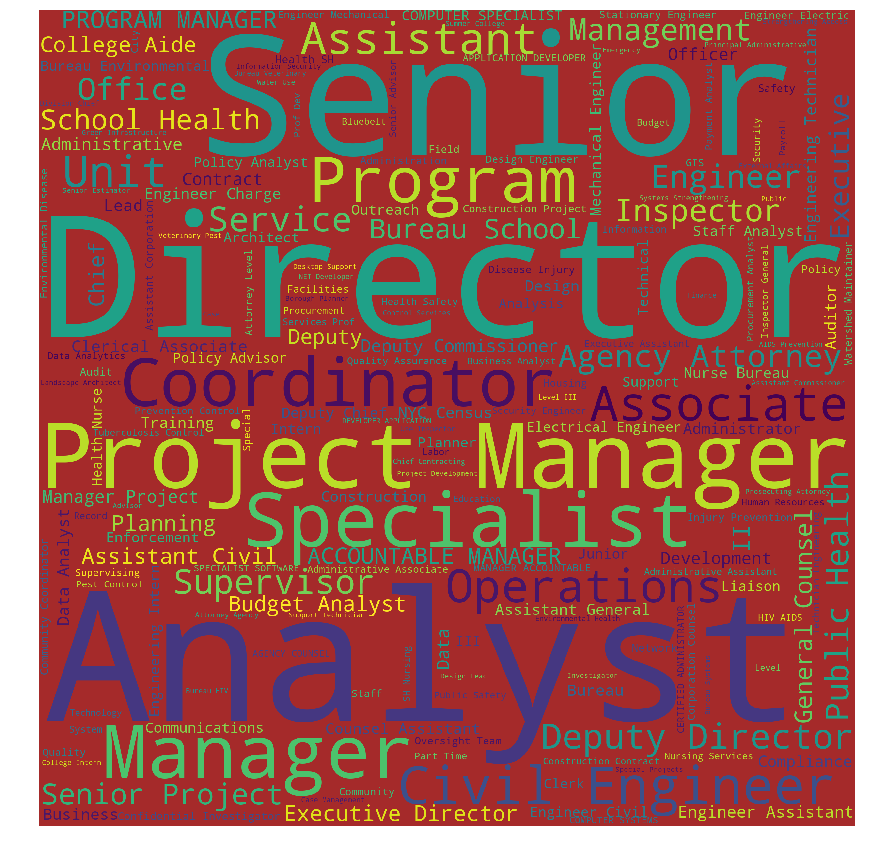

In [29]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (15,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Business_Title)

In [30]:
Business_Title = Business_Title.tolist()

In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [32]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Business_Title))

print(data_words[:1])

[['account', 'manager']]


In [33]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['account', 'manager']


In [34]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [35]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['account', 'manager'], ['director', 'business', 'development'], ['maintenance', 'worker', 'service', 'heating', 'unit'], ['maintenance', 'worker', 'service', 'heating', 'unit']]


In [36]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [37]:
id2word[0]

'account'

In [38]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('account', 1), ('manager', 1)],
 [('business', 1), ('development', 1), ('director', 1)],
 [('heating', 1),
  ('maintenance', 1),
  ('service', 1),
  ('unit', 1),
  ('worker', 1)]]

# Build LDA Model for Business Title Data

In [39]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [40]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.100*"coordinator" + 0.076*"policy" + 0.058*"training" + 0.051*"agency" + '
  '0.039*"investigation" + 0.036*"level" + 0.030*"city" + 0.020*"compliance" + '
  '0.020*"intern" + 0.019*"safety"'),
 (1,
  '0.185*"manager" + 0.151*"project" + 0.144*"analyst" + 0.050*"assistant" + '
  '0.032*"datum" + 0.027*"liaison" + 0.027*"community" + 0.023*"construction" '
  '+ 0.023*"officer" + 0.020*"initiative"'),
 (2,
  '0.144*"director" + 0.102*"specialist" + 0.067*"inspector" + 0.049*"deputy" '
  '+ 0.047*"investigator" + 0.043*"management" + 0.040*"operation" + '
  '0.040*"attorney" + 0.029*"commissioner" + 0.025*"asset"'),
 (3,
  '0.100*"program" + 0.070*"development" + 0.040*"office" + 0.040*"associate" '
  '+ 0.037*"affair" + 0.036*"advisor" + 0.034*"bureau" + 0.032*"planner" + '
  '0.028*"developer" + 0.023*"clerk"'),
 (4,
  '0.122*"engineer" + 0.079*"service" + 0.075*"counsel" + 0.054*"supervisor" + '
  '0.053*"unit" + 0.043*"aide" + 0.034*"design" + 0.032*"college" + '
  '0.027*"b

In [41]:
# Compute Model Perplexity and Coherence Score

In [42]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.814901835786875

Coherence Score:  0.6544269868594033


In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.370159 -0.102494       1        1  24.649536
2     -0.202422 -0.309900       2        1  23.224632
4     -0.084391  0.203920       3        1  19.784389
3     -0.034204  0.178222       4        1  16.779066
0     -0.049142  0.030252       5        1  15.562375, topic_info=    Category        Freq            Term       Total  loglift  logprob
1    Default  368.000000         manager  368.000000  30.0000  30.0000
15   Default  301.000000         project  301.000000  29.0000  29.0000
11   Default  287.000000         analyst  287.000000  28.0000  28.0000
4    Default  270.000000        director  270.000000  27.0000  27.0000
41   Default  195.000000        engineer  195.000000  26.0000  26.0000
30   Default  191.000000      specialist  191.000000  25.0000  25.0000
69   Default  136.000000         program  136.000000  24.0000  24.0000
36   Default  126.000000     coordinator  126.000000  23.0000  23.0000
7    Default  127.000000         service  127.000000  22.0000  22.0000
224  Default  119.000000         counsel  119.000000  21.0000  21.0000
182  Default  126.000000       inspector  126.000000  20.0000  20.0000
94   Default   96.000000          policy   96.000000  19.0000  19.0000
3    Default   95.000000     development   95.000000  18.0000  18.0000
34   Default   86.000000      supervisor   86.000000  17.0000  17.0000
43   Default  101.000000       assistant  101.000000  16.0000  16.0000
8    Default   86.000000            unit   86.000000  15.0000  15.0000
201  Default   73.000000        training   73.000000  14.0000  14.0000
18   Default   93.000000          deputy   93.000000  13.0000  13.0000
96   Default   89.000000    investigator   89.000000  12.0000  12.0000
194  Default   64.000000          agency   64.000000  11.0000  11.0000
89   Default   80.000000      management   80.000000  10.0000  10.0000
22   Default   69.000000            aide   69.000000   9.0000   9.0000
154  Default   75.000000       operation   75.000000   8.0000   8.0000
152  Default   75.000000        attorney   75.000000   7.0000   7.0000
16   Default   55.000000          office   55.000000   6.0000   6.0000
24   Default   54.000000       associate   54.000000   5.0000   5.0000
167  Default   50.000000   investigation   50.000000   4.0000   4.0000
25   Default   90.000000          bureau   90.000000   3.0000   3.0000
223  Default   50.000000          affair   50.000000   2.0000   2.0000
59   Default   49.000000         advisor   49.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
194   Topic5   64.013710          agency   64.789337   1.8483  -2.9759
167   Topic5   49.556526   investigation   50.349350   1.8444  -3.2319
20    Topic5   44.782841           level   45.560528   1.8431  -3.3331
334   Topic5   37.446724            city   38.228264   1.8397  -3.5121
102   Topic5   25.386177      compliance   26.162895   1.8302  -3.9008
105   Topic5   25.200932          intern   25.973276   1.8301  -3.9081
139   Topic5   23.834576          safety   24.607639   1.8284  -3.9638
19    Topic5   23.593285   administrator   24.369488   1.8279  -3.9740
284   Topic5   21.560638   communication   22.335651   1.8250  -4.0641
104   Topic5   19.740292     engineering   20.512213   1.8220  -4.1523
37    Topic5   18.653381  infrastructure   19.432800   1.8194  -4.2089
487   Topic5   23.697920      efficiency   24.728767   1.8177  -3.9696
431   Topic5   17.250427  representative   18.027916   1.8162  -4.2871
126   Topic5   17.496435           audit   18.287640   1.8161  -4.2730
117   Topic5   15.741849       architect   16.513094   1.8125  -4.3786
112   Topic5   15.690460  administration   16.468634   1.8119  -4.3819
9     Topic5   14.966769          worker   15.740315   1.8099  -4.4291
590   Topic5   14.367427       carpenter   15.173199   1.8057  -4.4700
230   Topic5   11.582206     

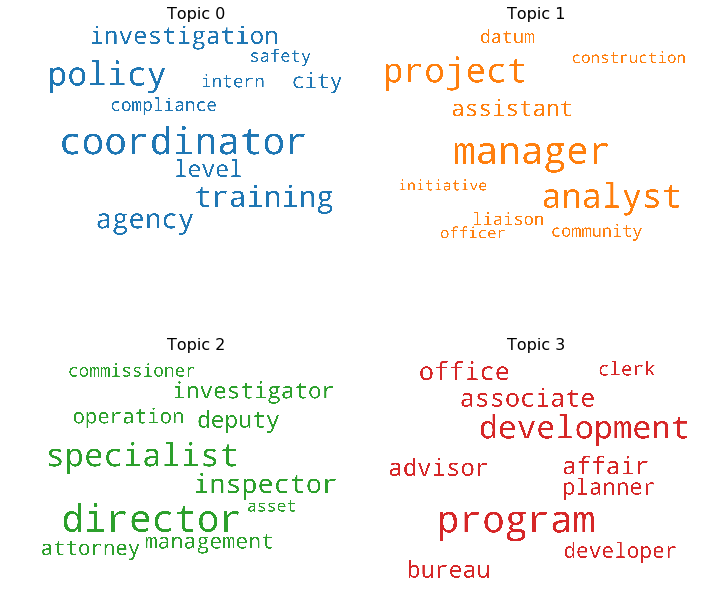

In [44]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [45]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [46]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [47]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.640144
1,0.010,6,0.613029
2,0.010,10,0.592933
3,0.010,15,0.587915
4,0.010,20,0.594402
5,0.100,2,0.624495
6,0.100,6,0.600828
7,0.100,10,0.585959
8,0.100,15,0.573139
9,0.100,20,0.591756


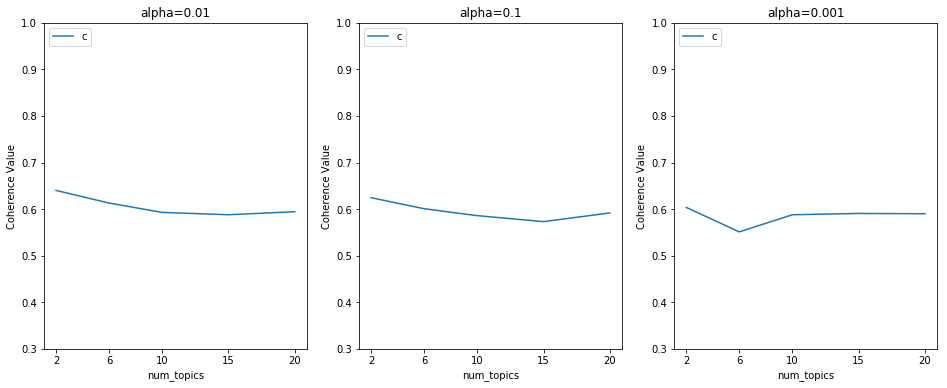

In [48]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [50]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.56086112699535

Coherence Score:  0.6068016473762036


In [51]:
coherence_model_lda.get_coherence_per_topic()

[0.61914658959743,
 0.6426565549105553,
 0.5981514916840325,
 0.5509739776066389,
 0.6136040160141772,
 0.6258774639587913,
 0.5773314114817223,
 0.7548030526581131,
 0.5661515667177726,
 0.6465791232544802,
 0.6251267918747875,
 0.4147216365368176,
 0.6705361954483389,
 0.62108062496884,
 0.5752842139305563]

In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.401354 -0.068682       1        1  10.353901
10    -0.126602 -0.366322       2        1   9.131750
3     -0.058182  0.112924       3        1   8.250498
11    -0.057405  0.109058       4        1   8.238738
5     -0.022677  0.082166       5        1   8.139134
13    -0.033927  0.067310       6        1   6.975742
12    -0.033947  0.065968       7        1   6.803706
1      0.306940 -0.049969       8        1   6.466564
8     -0.043584  0.054175       9        1   6.246963
2     -0.035112  0.064449      10        1   5.831457
0     -0.037068  0.060385      11        1   5.684517
9     -0.047225  0.042863      12        1   5.250939
14    -0.045437  0.048426      13        1   5.019231
6     -0.116221 -0.237174      14        1   4.876749
7     -0.050908  0.014424      15        1   2.730107, topic_info=    Category        Freq            Term       Total  loglift  logprob
1    Default  467.000000         manager  467.000000  30.0000  30.0000
41   Default  305.000000        engineer  305.000000  29.0000  29.0000
4    Default  273.000000        director  273.000000  28.0000  28.0000
11   Default  326.000000         analyst  326.000000  27.0000  27.0000
15   Default  272.000000         project  272.000000  26.0000  26.0000
94   Default  173.000000          policy  173.000000  25.0000  25.0000
182  Default  159.000000       inspector  159.000000  24.0000  24.0000
36   Default  145.000000     coordinator  145.000000  23.0000  23.0000
30   Default  184.000000      specialist  184.000000  22.0000  22.0000
69   Default  133.000000         program  133.000000  21.0000  21.0000
89   Default  123.000000      management  123.000000  20.0000  20.0000
7    Default  125.000000         service  125.000000  19.0000  19.0000
224  Default  116.000000         counsel  116.000000  18.0000  18.0000
3    Default  103.000000     development  103.000000  17.0000  17.0000
34   Default  117.000000      supervisor  117.000000  16.0000  16.0000
8    Default  104.000000            unit  104.000000  15.0000  15.0000
96   Default  100.000000    investigator  100.000000  14.0000  14.0000
25   Default  141.000000          bureau  141.000000  13.0000  13.0000
154  Default   95.000000       operation   95.000000  12.0000  12.0000
152  Default   93.000000        attorney   93.000000  11.0000  11.0000
43   Default  104.000000       assistant  104.000000  10.0000  10.0000
18   Default   94.000000          deputy   94.000000   9.0000   9.0000
88   Default   71.000000           asset   71.000000   8.0000   8.0000
59   Default   84.000000         advisor   84.000000   7.0000   7.0000
16   Default   83.000000          office   83.000000   6.0000   6.0000
192  Default   66.000000    construction   66.000000   5.0000   5.0000
194  Default   74.000000          agency   74.000000   4.0000   4.0000
141  Default   74.000000         officer   74.000000   3.0000   3.0000
53   Default   67.000000    commissioner   67.000000   2.0000   2.0000
22   Default   61.000000            aide   61.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
395  Topic15    0.325715       archivist    1.517459   2.0621  -6.5162
13   Topic15    0.325714         chemist    1.517458   2.0621  -6.5162
526  Topic15    0.325714              ac    1.517458   2.0621  -6.5162
598  Topic15    0.325714            tape    1.517458   2.0621  -6.5162
597  Topic15    0.325714       librarian    1.517458   2.0621  -6.5162
515  Topic15    0.325713           oiler    1.517456   2.0621  -6.5162
376  Topic15    0.325749        examiner    1.517711   2.0620  -6.5161
253  Topic15    0.325743           motor    1.517841   2.0619  -6.5161
227  Topic15    0.325761        building    1.519194   2.0611  -6.5160
180  Topic15    0.325758        operator    1.521707   2.0594  -6.5161
160  Topic15    0.325754            plan    1.521811   2.

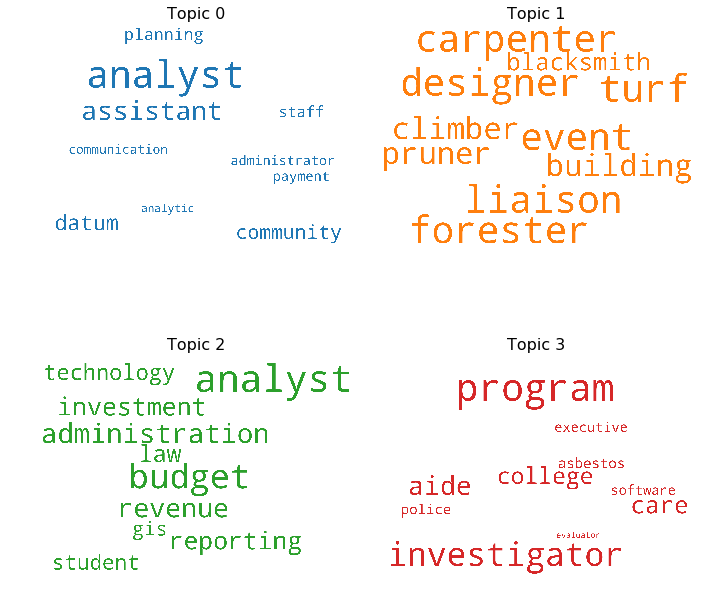

In [53]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()